In [1]:
import pandas as pd
import unicodedata
import matplotlib.pyplot as plt

In [2]:
PGJ_input=pd.read_csv("Carpetas de Investigación PGJ CDMX.csv",sep=";")
PGJ_input.head()

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalía,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,Geopoint
0,2017.0,Junio,2017-06-19 10:00:00,ROBO A NEGOCIO SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-8,UI-1SD,BUENOS AIRES,CUAUHTEMOC,2017-06-19 13:46:37,Junio,2017,EJE 3 SUR,DOCTOR QUIROGA,-99.145673,19.406269,"19.406269303, -99.1456727623"
1,2016.0,Noviembre,2016-11-15 12:00:00,DESPOJO,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-4,UI-1SD,CUAUHTÉMOC,CUAUHTEMOC,2017-06-19 13:48:22,Junio,2017,AVENIDA PASEO DE LA REFORMA,NaN,-99.162689,19.429468,"19.4294676006, -99.1626885107"
2,2017.0,Junio,2017-06-19 05:00:00,ROBO A PASAJERO / CONDUCTOR DE TAXI CON VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN TLALPAN,TLP-2,UI-1CD,MESA DE LOS HORNOS,TLALPAN,2017-06-19 13:52:15,Junio,2017,AHUACTEPEC,NaN,-99.184597,19.278135,"19.2781350645, -99.1845967763"
3,2017.0,Junio,2017-06-19 06:00:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN MIGUEL HIDALGO,MH-4,UI-1SD,TACUBAYA,MIGUEL HIDALGO,2017-06-19 13:58:31,Junio,2017,AV. JALISCO,ANILLO PERIFERICO,-99.189690,19.398010,"19.3980098652, -99.1896899072"
4,2017.0,Marzo,2017-03-13 12:00:00,ABUSO DE CONFIANZA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN XOCHIMILCO,XO-2,UI-1SD,SAN MARCOS NORTE,XOCHIMILCO,2017-06-19 14:11:16,Junio,2017,GUADALUPE I. RAMÍREZ,PROLONGACIÓN GUADALUPE I. RAMÍREZ,-99.114178,19.265863,"19.2658632688, -99.1141782469"


In [3]:
Alcaldias_input=pd.read_csv("Alcaldías.csv",sep=";")
Alcaldias_input

,NOMBRE,CLAVE_MUNICIPAL,CVE_ENTIDAD,CVEGEO,Geo Point,Geo Shape
0,Tlalpan,12,9,9012,"19.1983396763, -99.2062207957","{""type"": ""Polygon"", ""coordinates"": [[[-99.1962..."
1,Tláhuac,11,9,9011,"19.2769983772, -99.0028216137","{""type"": ""Polygon"", ""coordinates"": [[[-98.9789..."
2,Venustiano Carranza,17,9,9017,"19.4304954545, -99.0931057959","{""type"": ""Polygon"", ""coordinates"": [[[-99.1089..."
3,Cuauhtémoc,15,9,9015,"19.4313734294, -99.1490557562","{""type"": ""Polygon"", ""coordinates"": [[[-99.1291..."
4,Iztapalapa,7,9,9007,"19.3491663204, -99.0567989642","{""type"": ""Polygon"", ""coordinates"": [[[-99.0581..."
5,Azcapotzalco,2,9,9002,"19.4853286147, -99.1821069423","{""type"": ""Polygon"", ""coordinates"": [[[-99.1823..."
6,Benito Juárez,14,9,9014,"19.3806424162, -99.1611346584","{""type"": ""Polygon"", ""coordinates"": [[[-99.1367..."
7,Cuajimalpa de Morelos,4,9,9004,"19.3246343001, -99.3107285253","{""type"": ""Polygon"", ""coordinates"": [[[-99.2569..."
8,Iztacalco,6,9,9006,"19.396911897, -99.094329797","{""type"": ""Polygon"", ""coordinates"": [[[-99.0558..."
9,Gustavo A. Madero,5,9,9005,"19.5040652077, -99.1158642087","{""type"": ""Polygon"", ""coordinates"": [[[-99.1185..."


In [4]:
PGJ_input["categoria_delito"].unique()

array(['DELITO DE BAJO IMPACTO',
       'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA',
       'ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA',
       'ROBO A NEGOCIO CON VIOLENCIA', 'HECHO NO DELICTIVO',
       'ROBO A REPARTIDOR CON Y SIN VIOLENCIA',
       'ROBO DE VEHÍCULO CON Y SIN VIOLENCIA', 'HOMICIDIO DOLOSO',
       'LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO',
       'ROBO A CASA HABITACIÓN CON VIOLENCIA',
       'ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA',
       'ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA', 'VIOLACIÓN',
       'ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA',
       'ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA', 'SECUESTRO'],
      dtype=object)

In [5]:
alcaldias=Alcaldias_input["NOMBRE"]
alcaldias=alcaldias.str.replace("Á","A")
alcaldias=alcaldias.str.replace("á","a")
alcaldias=alcaldias.str.replace("É","E")
alcaldias=alcaldias.str.replace("é","e")
alcaldias=alcaldias.str.replace("Í","I")
alcaldias=alcaldias.str.replace("í","i")
alcaldias=alcaldias.str.replace("Ó","O")
alcaldias=alcaldias.str.replace("ó","o")
alcaldias=alcaldias.str.replace("Ú","u")
alcaldias=alcaldias.str.replace("ú","u")
alcaldias = [alcaldia.upper() for alcaldia in alcaldias]
alcaldias

['TLALPAN',
 'TLAHUAC',
 'VENUSTIANO CARRANZA',
 'CUAUHTEMOC',
 'IZTAPALAPA',
 'AZCAPOTZALCO',
 'BENITO JUAREZ',
 'CUAJIMALPA DE MORELOS',
 'IZTACALCO',
 'GUSTAVO A. MADERO',
 'MIGUEL HIDALGO',
 'LA MAGDALENA CONTRERAS',
 'COYOACAN',
 'MILPA ALTA',
 'ALVARO OBREGON',
 'XOCHIMILCO']

In [6]:
PGJ_alcaldias=PGJ_input.loc[PGJ_input["alcaldia_hechos"].isin(alcaldias),:]
PGJ_alcaldias

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalía,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,Geopoint
0,2017.0,Junio,2017-06-19 10:00:00,ROBO A NEGOCIO SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-8,UI-1SD,BUENOS AIRES,CUAUHTEMOC,2017-06-19 13:46:37,Junio,2017,EJE 3 SUR,DOCTOR QUIROGA,-99.145673,19.406269,"19.406269303, -99.1456727623"
1,2016.0,Noviembre,2016-11-15 12:00:00,DESPOJO,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-4,UI-1SD,CUAUHTÉMOC,CUAUHTEMOC,2017-06-19 13:48:22,Junio,2017,AVENIDA PASEO DE LA REFORMA,NaN,-99.162689,19.429468,"19.4294676006, -99.1626885107"
2,2017.0,Junio,2017-06-19 05:00:00,ROBO A PASAJERO / CONDUCTOR DE TAXI CON VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN TLALPAN,TLP-2,UI-1CD,MESA DE LOS HORNOS,TLALPAN,2017-06-19 13:52:15,Junio,2017,AHUACTEPEC,NaN,-99.184597,19.278135,"19.2781350645, -99.1845967763"
3,2017.0,Junio,2017-06-19 06:00:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN MIGUEL HIDALGO,MH-4,UI-1SD,TACUBAYA,MIGUEL HIDALGO,2017-06-19 13:58:31,Junio,2017,AV. JALISCO,ANILLO PERIFERICO,-99.189690,19.398010,"19.3980098652, -99.1896899072"
4,2017.0,Marzo,2017-03-13 12:00:00,ABUSO DE CONFIANZA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN XOCHIMILCO,XO-2,UI-1SD,SAN MARCOS NORTE,XOCHIMILCO,2017-06-19 14:11:16,Junio,2017,GUADALUPE I. RAMÍREZ,PROLONGACIÓN GUADALUPE I. RAMÍREZ,-99.114178,19.265863,"19.2658632688, -99.1141782469"
5,2017.0,Junio,2017-06-16 02:00:00,ROBO A NEGOCIO SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN TLALPAN,TLP-3,UI-1CD,ISIDRO FABELA,TLALPAN,2017-06-19 14:12:37,Junio,2017,ANILLO PERIF. BOULEVARD ADOLFO RUIZ CORTINEZ,NaN,-99.176686,19.303028,"19.3030281171, -99.1766860005"
6,2017.0,Junio,2017-06-19 13:22:00,"NARCOMENUDEO POSESIÓN CON FINES DE VENTA, COME...",DELITO DE BAJO IMPACTO,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE N...,ACD,UI-1CD,MOCTEZUMA 2A SECCIÓN,VENUSTIANO CARRANZA,2017-06-19 14:13:11,Junio,2017,ORIENTE 144,NaN,-99.104402,19.430180,"19.4301803453, -99.1044015884"
7,2017.0,Junio,2017-06-17 15:15:00,ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,INVESTIGACIÓN EN AGENCIAS DE ATENCIÓN ESPECIAL...,STCMH,UI-1CD,GUERRERO,CUAUHTEMOC,2017-06-19 14:14:36,Junio,2017,ESTACION DEL METRO HIDALGO,AL ABORDAR VAGON DEL METRO,-99.146097,19.437645,"19.4376450034, -99.146096728"
9,2017.0,Junio,2017-06-18 11:00:00,ROBO A NEGOCIO CON VIOLENCIA,ROBO A NEGOCIO CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-1SD,JUAN ESCUTIA,IZTAPALAPA,2017-06-19 14:17:54,Junio,2017,JOAQUIN GUTIERREZ,NaN,-99.048867,19.395322,"19.3953224177, -99.0488673055"
11,2017.0,Junio,2017-06-18 12:00:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN TLALPAN,TLP-3,UI-1CD,SAN MIGUEL TOPILEJO,TLALPAN,2017-06-19 14:21:52,Junio,2017,AV. SANTA CRUZ,NaN,-99.144865,19.192782,"19.1927817001, -99.1448647132"


In [7]:
Primer_año=2016
Ultimo_año=2019

In [8]:
PGJ_base=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]>Primer_año-1,:]
PGJ_base=PGJ_base.loc[PGJ_base["año_hechos"]<Ultimo_año+1,:]
PGJ_base.head()

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalía,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,Geopoint
0,2017.0,Junio,2017-06-19 10:00:00,ROBO A NEGOCIO SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-8,UI-1SD,BUENOS AIRES,CUAUHTEMOC,2017-06-19 13:46:37,Junio,2017,EJE 3 SUR,DOCTOR QUIROGA,-99.145673,19.406269,"19.406269303, -99.1456727623"
1,2016.0,Noviembre,2016-11-15 12:00:00,DESPOJO,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-4,UI-1SD,CUAUHTÉMOC,CUAUHTEMOC,2017-06-19 13:48:22,Junio,2017,AVENIDA PASEO DE LA REFORMA,NaN,-99.162689,19.429468,"19.4294676006, -99.1626885107"
2,2017.0,Junio,2017-06-19 05:00:00,ROBO A PASAJERO / CONDUCTOR DE TAXI CON VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN TLALPAN,TLP-2,UI-1CD,MESA DE LOS HORNOS,TLALPAN,2017-06-19 13:52:15,Junio,2017,AHUACTEPEC,NaN,-99.184597,19.278135,"19.2781350645, -99.1845967763"
3,2017.0,Junio,2017-06-19 06:00:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN MIGUEL HIDALGO,MH-4,UI-1SD,TACUBAYA,MIGUEL HIDALGO,2017-06-19 13:58:31,Junio,2017,AV. JALISCO,ANILLO PERIFERICO,-99.189690,19.398010,"19.3980098652, -99.1896899072"
4,2017.0,Marzo,2017-03-13 12:00:00,ABUSO DE CONFIANZA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN XOCHIMILCO,XO-2,UI-1SD,SAN MARCOS NORTE,XOCHIMILCO,2017-06-19 14:11:16,Junio,2017,GUADALUPE I. RAMÍREZ,PROLONGACIÓN GUADALUPE I. RAMÍREZ,-99.114178,19.265863,"19.2658632688, -99.1141782469"


In [9]:
PGJ_Tipo_Delito=PGJ_base.groupby(["año_hechos","categoria_delito","alcaldia_hechos"]).count()
PGJ_Tipo_Delito=PGJ_Tipo_Delito["delito"]
PGJ_Tipo_Delito.head()

año_hechos  categoria_delito        alcaldia_hechos      
2016.0      DELITO DE BAJO IMPACTO  ALVARO OBREGON            9773
                                    AZCAPOTZALCO              7976
                                    BENITO JUAREZ            13662
                                    COYOACAN                 10913
                                    CUAJIMALPA DE MORELOS     2498
Name: delito, dtype: int64

In [10]:
PGJ_2018=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]==2018,:]
PGJ_Top30_2018=PGJ_2018.groupby(["delito"],as_index=False).count()
PGJ_Top30_2018=(PGJ_Top30_2018.sort_values(by ="año_hechos",ascending=False)).head(30)
PGJ_Top30_2018=PGJ_Top30_2018["delito"]
PGJ_Top30_2018.tolist()

['VIOLENCIA FAMILIAR',
 'ROBO A NEGOCIO SIN VIOLENCIA',
 'ROBO DE OBJETOS',
 'ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA',
 'FRAUDE',
 'DENUNCIA DE HECHOS',
 'AMENAZAS',
 'ROBO DE ACCESORIOS DE AUTO',
 'ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO',
 'ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA',
 'ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA',
 'FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMENTOS DE CREDITO PUBLICO',
 'ROBO A CASA HABITACION SIN VIOLENCIA',
 'ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA',
 'NARCOMENUDEO POSESION SIMPLE',
 'DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A AUTOMOVIL',
 'ABUSO DE CONFIANZA',
 'ROBO A NEGOCIO CON VIOLENCIA',
 'DESPOJO',
 'ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VIOLENCIA',
 'DAÑO EN PROPIEDAD AJENA INTENCIONAL',
 'LESIONES INTENCIONALES POR GOLPES',
 'LESIONES CULPOSAS POR TRANSITO VEHICULAR EN COLISION',
 'USURPACIÓN DE IDENTIDAD',
 'ABUSO SEXUAL',
 'ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VIOLENCIA',
 'ROBO DE DIN

In [17]:
PGJ_2016=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]==2016,:]
PGJ_2017=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]==2017,:]
PGJ_2018=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]==2018,:]
PGJ_2019=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]==2019,:]
PGJ_2019.head()

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalía,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,Geopoint
107819,2019.0,Enero,2019-01-28 21:30:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,JUZGADOS FAMILIARES,75BIS,1 S/D,CHIMALCOYOTL,TLALPAN,2019-02-12 13:31:00,Febrero,2019,CRISTOBAL COLON,NaN,-99.169195,19.274235,"19.2742348613, -99.1691947406"
107820,2019.0,Enero,2019-01-26 18:00:00,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN TLAHUAC,TLH-1,UI-1SD,MIGUEL HIDALGO,TLAHUAC,2019-02-12 13:38:00,Febrero,2019,GUILLERMO PRIETO,TOMAR MORLEY,-99.041365,19.293601,"19.2936006823, -99.041365273"
107822,2019.0,Febrero,2019-02-09 16:30:00,FRAUDE,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN ÁLVARO OBREGÓN,AO-4,UI-1SD,ATLAMAYA,ALVARO OBREGON,2019-02-12 13:45:00,Febrero,2019,CARRILES CENTRALES DE PERIFERICO EN DIRECCIÓN ...,NaN,-99.200900,19.350173,"19.3501733347, -99.2008995833"
107823,2019.0,Febrero,2019-02-10 18:50:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,JUZGADOS FAMILIARES,75BIS,1 S/D,SELENE 1A. SECCION,TLAHUAC,2019-02-12 13:45:00,Febrero,2019,LAGO DE LOS SUEÑOS,NaN,-99.005719,19.291441,"19.2914411005, -99.0057187997"
107824,2019.0,Enero,2019-01-29 11:00:00,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN BENITO JUÁREZ,URI-BJ-4,UI-1SD,XOCO,BENITO JUAREZ,2019-02-12 13:46:00,Febrero,2019,PUENTE DE XOCO,SAN FELIPE MAYORAZGO,-99.165951,19.362108,"19.362108422, -99.1659505692"


In [12]:
PGJ_Top_2016=PGJ_2016.loc[PGJ_input["delito"].isin(PGJ_Top30_2018),:]
PGJ_Top_2017=PGJ_2017.loc[PGJ_input["delito"].isin(PGJ_Top30_2018),:]
PGJ_Top_2018=PGJ_2018.loc[PGJ_input["delito"].isin(PGJ_Top30_2018),:]
PGJ_Top_2019=PGJ_2019.loc[PGJ_input["delito"].isin(PGJ_Top30_2018),:]
#alcaldias_2017=PGJ_Top_2017.groupby(["alcaldia_hechos"]).count()
#alcaldias_2017

In [24]:
Total_Delitos_Alcaldias_2018=PGJ_Top_2018.groupby("alcaldia_hechos").count()
Total_Delitos_Alcaldias_2018=Total_Delitos_Alcaldias_2018.loc[:,["delito"]].astype(float)
Total_Delitos_Alcaldias_2018

,delito
alcaldia_hechos,
ALVARO OBREGON,13625.0
AZCAPOTZALCO,10007.0
BENITO JUAREZ,19049.0
COYOACAN,14147.0
CUAJIMALPA DE MORELOS,2690.0
CUAUHTEMOC,31274.0
IZTACALCO,8799.0
IZTAPALAPA,28340.0
LA MAGDALENA CONTRERAS,2872.0


AttributeError: 'float' object has no attribute 'deg2rad'

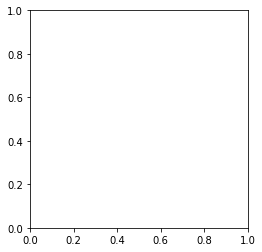

In [25]:
plt.pie(Total_Delitos_Alcaldias_2018)